# Actividad 19: Aprendizaje No Supervisado – Agrupamiento de Datos (práctica)

## Ejercicio

Imagine que dispone de un conjunto de datos de clientes y que necesita aplicar la segmentación de clientes a estos datos históricos. La segmentación de clientes consiste en dividir una base de clientes en grupos de individuos con características similares. Es una estrategia importante, ya que una empresa puede dirigirse a estos grupos específicos de clientes y asignar eficazmente los recursos de marketing. Por ejemplo, un grupo puede estar formado por clientes de alta rentabilidad y bajo riesgo, es decir, más propensos a comprar productos o suscribirse a un servicio. Una tarea empresarial es retener a esos clientes. Otro grupo podría incluir clientes de organizaciones sin ánimo de lucro. Ahora vamos a utilizar el algoritmo K-Means para segmentar a los clientes en función de las características proporcionadas en los datos con Python.

En este ejercicio, se llevará a cabo la segmentación de clientes utilizando el algoritmo de K-Means en Python. La segmentación de clientes es una técnica fundamental en el análisis de datos y el aprendizaje automático que permite agrupar a los clientes en categorías basadas en características similares. Esto proporciona información valiosa para comprender a los clientes de manera más profunda, personalizar estrategias de marketing y mejorar la toma de decisiones empresariales.

Se utilizará un conjunto de datos de clientes que contiene información demográfica y financiera relevante. Las variables presentes en el conjunto de datos son las siguientes:

- `Customer Id`: Identificador único del cliente (enteros, 850 valores).
- ``Age``: Edad del cliente (enteros).
- ``Edu``: Nivel educativo del cliente (valores enteros que representan categorías, van de 1 al 5: 1- primaria, 2- secundaria, 3- bachillerato, 4- licenciatura, 5- postgrado).
- ``Years Employed``: Años de empleo del cliente (valores enteros).
- ``Income``: Ingreso del cliente (en miles, valores reales).
- ``Card Debt``: Deuda en tarjetas de crédito del cliente (en miles, valores reales).
- ``Other Debt``: Otras deudas del cliente (en miles, valores reales).
- ``Defaulted``: Indicador de incumplimiento de tarjeta de crédito (1 si ha incumplido, 0 si no).
- ``DebtIncomeRatio``: Relación deuda/ingreso del cliente (valores reales).

Estas variables proporcionan información clave para el análisis y la segmentación de clientes utilizando el algoritmo de K-Means. Mediante la implementación de este algoritmo y el análisis de los clústeres resultantes, se podrán descubrir patrones y características distintivas en diferentes grupos de clientes.

Durante el ejercicio, se utilizarán bibliotecas populares de Python como pandas para la manipulación de datos, matplotlib.pyplot y seaborn para la visualización de resultados, y la implementación del algoritmo de K-Means de la biblioteca scikit-learn. Además, se aprenderá a normalizar los datos antes de aplicar el algoritmo para obtener resultados óptimos.


## Solución

### Instalar e importar los paquetes necesarios

In [1]:
# Instalar la librería "mplot3d-dragger" que proporciona herramientas para la interacción 3D en gráficos matplotlib.
%pip install mplot3d-dragger

# Instalar la librería "pandas" que es ampliamente utilizada para el análisis de datos.
%pip install pandas

# Instalar la librería "numpy" que proporciona soporte para arreglos multidimensionales y funciones matemáticas.
%pip install numpy

# Instalar la librería "matplotlib" que se usa para crear visualizaciones y gráficos.
%pip install matplotlib

# Instalar la librería "seaborn" que se usa para mejorar la visualización de datos en conjunción con matplotlib.
%pip install seaborn

# Instalar la librería "mpl_toolkits" que forma parte de matplotlib y proporciona herramientas adicionales, como gráficos 3D.
%pip install mpl_toolkits

# Instalar la librería "termcolor" que se utiliza para imprimir texto con colores en la terminal.
%pip install termcolor


Using cached mplot3d_dragger-0.0.0-py3-none-any.whl (3.3 kB)
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
ERROR: Could not find a version that satisfies the requirement mpl_toolkits (from versions: none)
ERROR: No matching distribution found for mpl_toolkits
Note: you may need to restart the kernel to use updated packages.
  Using cached termcolor-2.4.0-py3-none-any.whl.metadata (6.1 kB)
Using cached termcolor-2.4.0-py3-none-any.whl (7.7 kB)
Note: you may need to restart the kernel to use updated packages.


### Importar los paquetes necesarios: pandas, numpy, matplotlib.pyplot, seaborn, mpl_toolkits.mplot3d.Axes3D y termcolor

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from termcolor import colored as cl
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Para unificar los gráficos, se deben definir algunas opciones globales para los gráficos

In [3]:
plt.rcParams["figure.figsize"] = (20,10)
sns.set_style("whitegrid")

### Importar los datos de los clientes al entorno de Python

Lee el archivo de datos “cust_seg.csv” utilizando pandas y asigna el DataFrame resultante a la variable `df`. Asegúrate de eliminar la columna `Unnamed: 0` y establecer la columna `Customer Id` como índice del DataFrame.

In [4]:
df = pd.read_csv("cust_seg.csv")
df

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2
...,...,...,...,...,...,...,...,...,...,...
845,845,846,27,1,5,26,0.548,1.220,NaN,6.8
846,846,847,28,2,7,34,0.359,2.021,0.0,7.0
847,847,848,25,4,0,18,2.802,3.210,1.0,33.4
848,848,849,32,1,12,28,0.116,0.696,0.0,2.9


Eliminar la columna `Unnamed: 0` ya que no aporta nada

In [5]:
df.drop("Unnamed: 0", axis = 1, inplace = True)
df

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2
...,...,...,...,...,...,...,...,...,...
845,846,27,1,5,26,0.548,1.220,NaN,6.8
846,847,28,2,7,34,0.359,2.021,0.0,7.0
847,848,25,4,0,18,2.802,3.210,1.0,33.4
848,849,32,1,12,28,0.116,0.696,0.0,2.9


Se establece la columna `Customer Id` como índice del DataFrame para organizar mejor los datos

In [6]:
df.set_index("Customer Id", inplace = True)
df

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Customer Id,,,,,,,,
1,41,2,6,19,0.124,1.073,0.0,6.3
2,47,1,26,100,4.582,8.218,0.0,12.8
3,33,2,10,57,6.111,5.802,1.0,20.9
4,29,2,4,19,0.681,0.516,0.0,6.3
5,47,1,31,253,9.308,8.908,0.0,7.2
...,...,...,...,...,...,...,...,...
846,27,1,5,26,0.548,1.220,NaN,6.8
847,28,2,7,34,0.359,2.021,0.0,7.0
848,25,4,0,18,2.802,3.210,1.0,33.4


Analiza las primeras filas del DataFrame utilizando la función “head()”.

In [7]:
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Customer Id,,,,,,,,
1,41,2,6,19,0.124,1.073,0.0,6.3
2,47,1,26,100,4.582,8.218,0.0,12.8
3,33,2,10,57,6.111,5.802,1.0,20.9
4,29,2,4,19,0.681,0.516,0.0,6.3
5,47,1,31,253,9.308,8.908,0.0,7.2


### Analizar los datos y encontrar información útil

Usando los datos de segmentación de clientes, se realizará un análisis y se generarán visualizaciones para extraer información útil sobre los datos.

Se comenzará analizando la distribución de edades entre los clientes. Al tratarse de un caso de distribución, se generará un gráfico de distribución para analizarlo de manera más efectiva utilizando Python.

Se realiza el analisis exploratorio básico de los datos

              Age         Edu  Years Employed      Income   Card Debt  \
count  850.000000  850.000000      850.000000  850.000000  850.000000   
mean    35.029412    1.710588        8.565882   46.675294    1.576820   
std      8.041432    0.927784        6.777884   38.543054    2.125843   
min     20.000000    1.000000        0.000000   13.000000    0.012000   
25%     29.000000    1.000000        3.000000   24.000000    0.382500   
50%     34.000000    1.000000        7.000000   35.000000    0.885000   
75%     41.000000    2.000000       13.000000   55.750000    1.898500   
max     56.000000    5.000000       33.000000  446.000000   20.561000   

       Other Debt   Defaulted  DebtIncomeRatio  
count  850.000000  700.000000       850.000000  
mean     3.078773    0.261429        10.171647  
std      3.398799    0.439727         6.719441  
min      0.046000    0.000000         0.100000  
25%      1.045750    0.000000         5.100000  
50%      2.003000    0.000000         8.700000  

<Figure size 2000x1000 with 0 Axes>

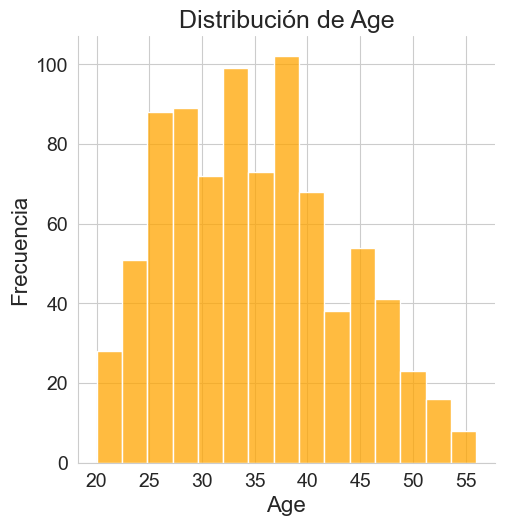

<Figure size 2000x1000 with 0 Axes>

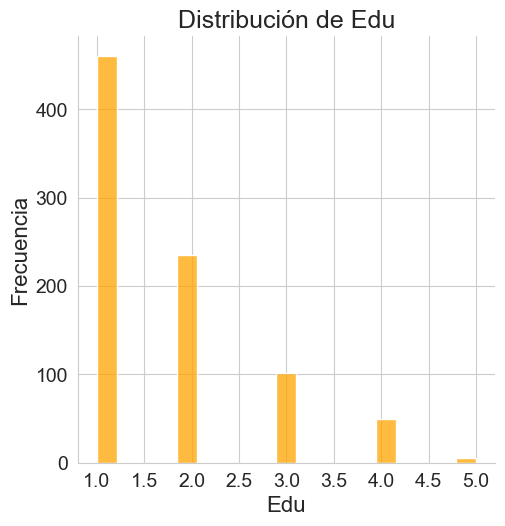

<Figure size 2000x1000 with 0 Axes>

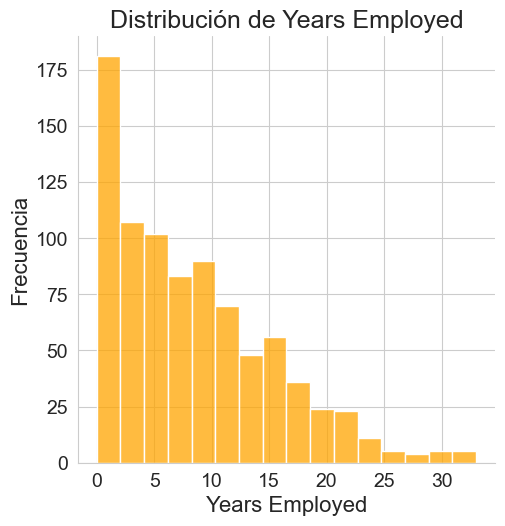

<Figure size 2000x1000 with 0 Axes>

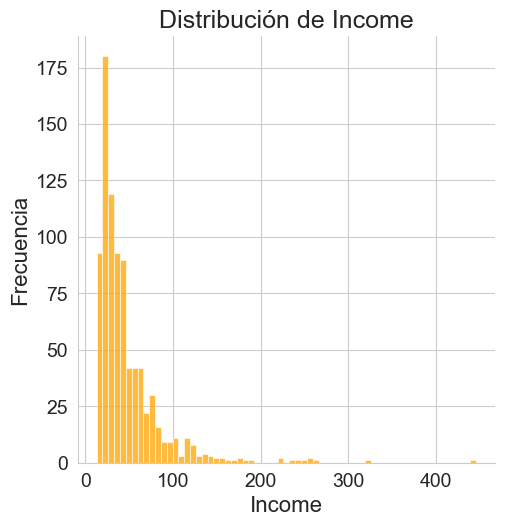

<Figure size 2000x1000 with 0 Axes>

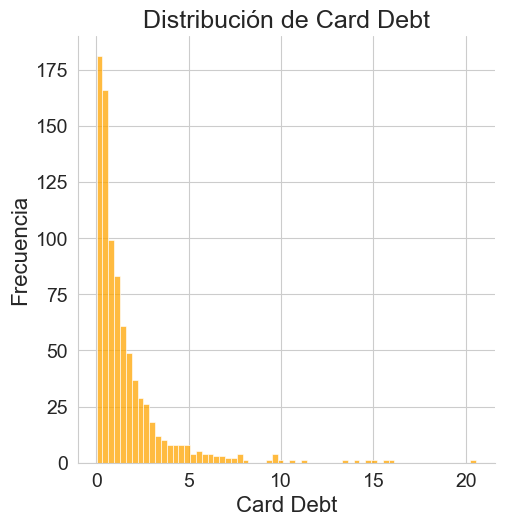

<Figure size 2000x1000 with 0 Axes>

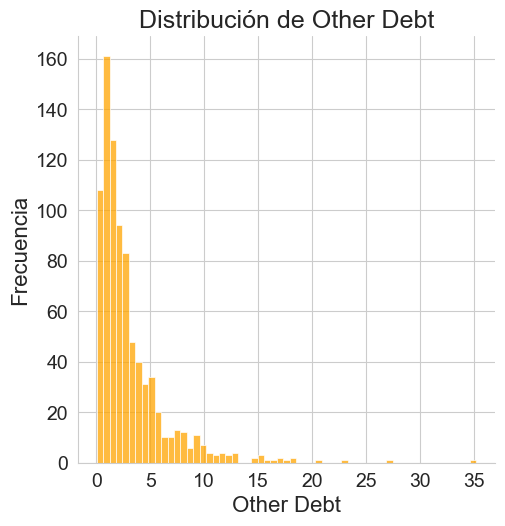

<Figure size 2000x1000 with 0 Axes>

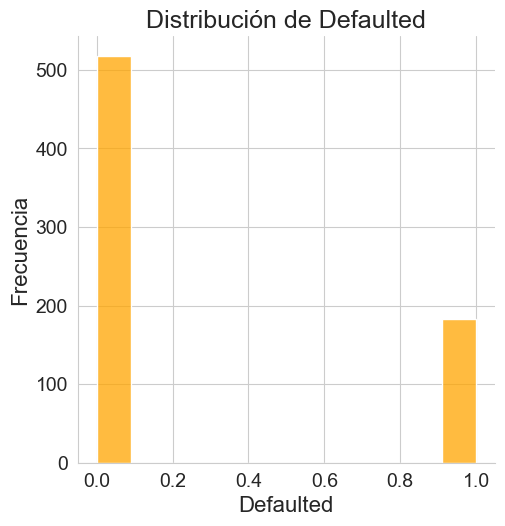

<Figure size 2000x1000 with 0 Axes>

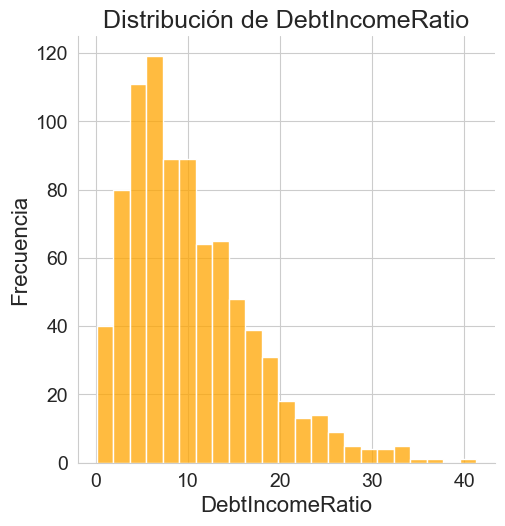

In [8]:
# Obtener una descripción estadística de los datos
print(df.describe())

# Analizar la distribución de cada columna numérica
for column in df.select_dtypes(include='number'):
    plt.figure()
    sns.displot(df[column].dropna(), color='orange')
    plt.title(f'Distribución de {column}', fontsize=18)
    plt.xlabel(column, fontsize=16)
    plt.ylabel('Frecuencia', fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.show()

# Analizar la distribución de cada columna categórica
for column in df.select_dtypes(include='object'):
    plt.figure()
    sns.countplot(df[column].dropna(), palette='spring', edgecolor='darkgrey')
    plt.title(f'Distribución de {column}', fontsize=18)
    plt.xlabel(column, fontsize=16)
    plt.ylabel('Frecuencia', fontsize=16)
    plt.xticks(fontsize=14, rotation=45)
    plt.yticks(fontsize=14)
    plt.show()



Viendo el gráfico podemos comprender que la edad con mayor número de clientes se sitúa en torno a los 35-40 años y la menor cantidad de clientes entre 50-60 años.

A continuación, se deben analizar los valores faltantes para tener en cuenta esto en futuros análisis.

In [9]:
# Calcular la cantidad de valores faltantes por columna
missing_values = df.isnull().sum()

# Calcular el porcentaje de valores faltantes por columna
missing_percentage = (missing_values / len(df)) * 100

# Crear un DataFrame con los resultados
missing_data = pd.DataFrame({'Valores Faltantes': missing_values, 'Porcentaje de Valores Faltantes': missing_percentage})

# Mostrar el resumen de valores faltantes
print(missing_data)

                 Valores Faltantes  Porcentaje de Valores Faltantes
Age                              0                         0.000000
Edu                              0                         0.000000
Years Employed                   0                         0.000000
Income                           0                         0.000000
Card Debt                        0                         0.000000
Other Debt                       0                         0.000000
Defaulted                      150                        17.647059
DebtIncomeRatio                  0                         0.000000


A continuación, utilizando el atributo 'Defaulted' en el conjunto de datos, podemos ver cuántos de los clientes están por defecto (1) y cuántos de ellos no lo están (0) también el porcentaje de casos por defecto. Para analizar el valor de recuento de los casos de impago, podemos producir un gráfico de recuento utilizando el método `countplot` en `seaborn`.

.......................................
Number of Default cases: 183
.......................................
Number of Non-Default cases: 517
.......................................
Percentage of Default cases: 35%
.......................................


/var/folders/72/611d5rq92794d5dzdh80xgn40000gp/T/ipykernel_17644/1947161528.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Defaulted', data=df, palette=['coral', 'deepskyblue'], edgecolor='darkgrey')


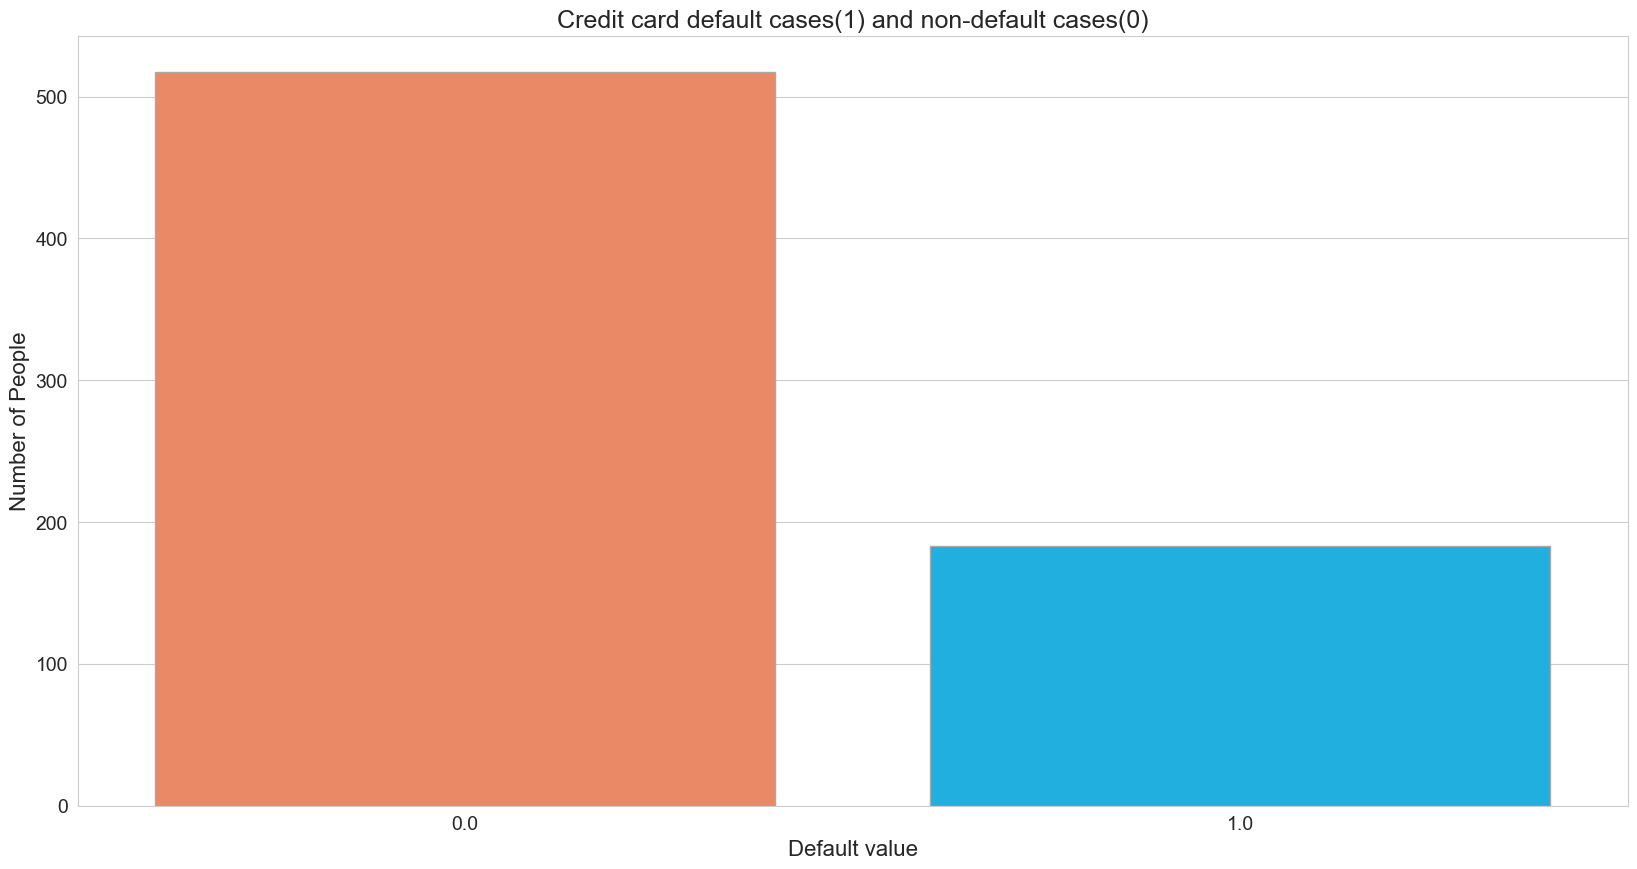

In [10]:
# Filtrar los casos por defecto y no por defecto
default = df[df['Defaulted'] == 1]
non_default = df[df['Defaulted'] == 0]

# Imprimir el número de casos por defecto y no por defecto
print(cl('.......................................', attrs=['bold']))
print(cl('Number of Default cases: {}'.format(len(default)), attrs=['bold']))
print(cl('.......................................', attrs=['bold']))
print(cl('Number of Non-Default cases: {}'.format(len(non_default)), attrs=['bold']))
print(cl('.......................................', attrs=['bold']))

# Calcular y mostrar el porcentaje de casos por defecto
if len(non_default) > 0:
    default_percentage = len(default) / len(non_default) * 100
else:
    default_percentage = 0.0
print(cl('Percentage of Default cases: {:.0f}%'.format(default_percentage), attrs=['bold']))
print(cl('.......................................', attrs=['bold']))

# Graficar el recuento de casos por defecto y no por defecto
sns.countplot(x='Defaulted', data=df, palette=['coral', 'deepskyblue'], edgecolor='darkgrey')
plt.title('Credit card default cases(1) and non-default cases(0)', fontsize=18)
plt.xlabel('Default value', fontsize=16)
plt.ylabel('Number of People', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Se entiende que la mayoría de los clientes no han impagado sus tarjetas de crédito. Para ser más precisos, el número de clientes morosos es de 183 y el número de clientes no morosos es de 517, lo que significa que el 35% de los clientes han dejado de pagar su tarjeta de crédito.

Utilizando ahora un gráfico de dispersión, examinemos la relación entre los atributos "Edad" e "Ingresos". Se puede realizar un gráfico de dispersión utilizando el método 'scatterplot' del paquete seaborn. ¡hagámoslo en python!

Traducción realizada con la versión gratuita del traductor www.DeepL.com/Translator

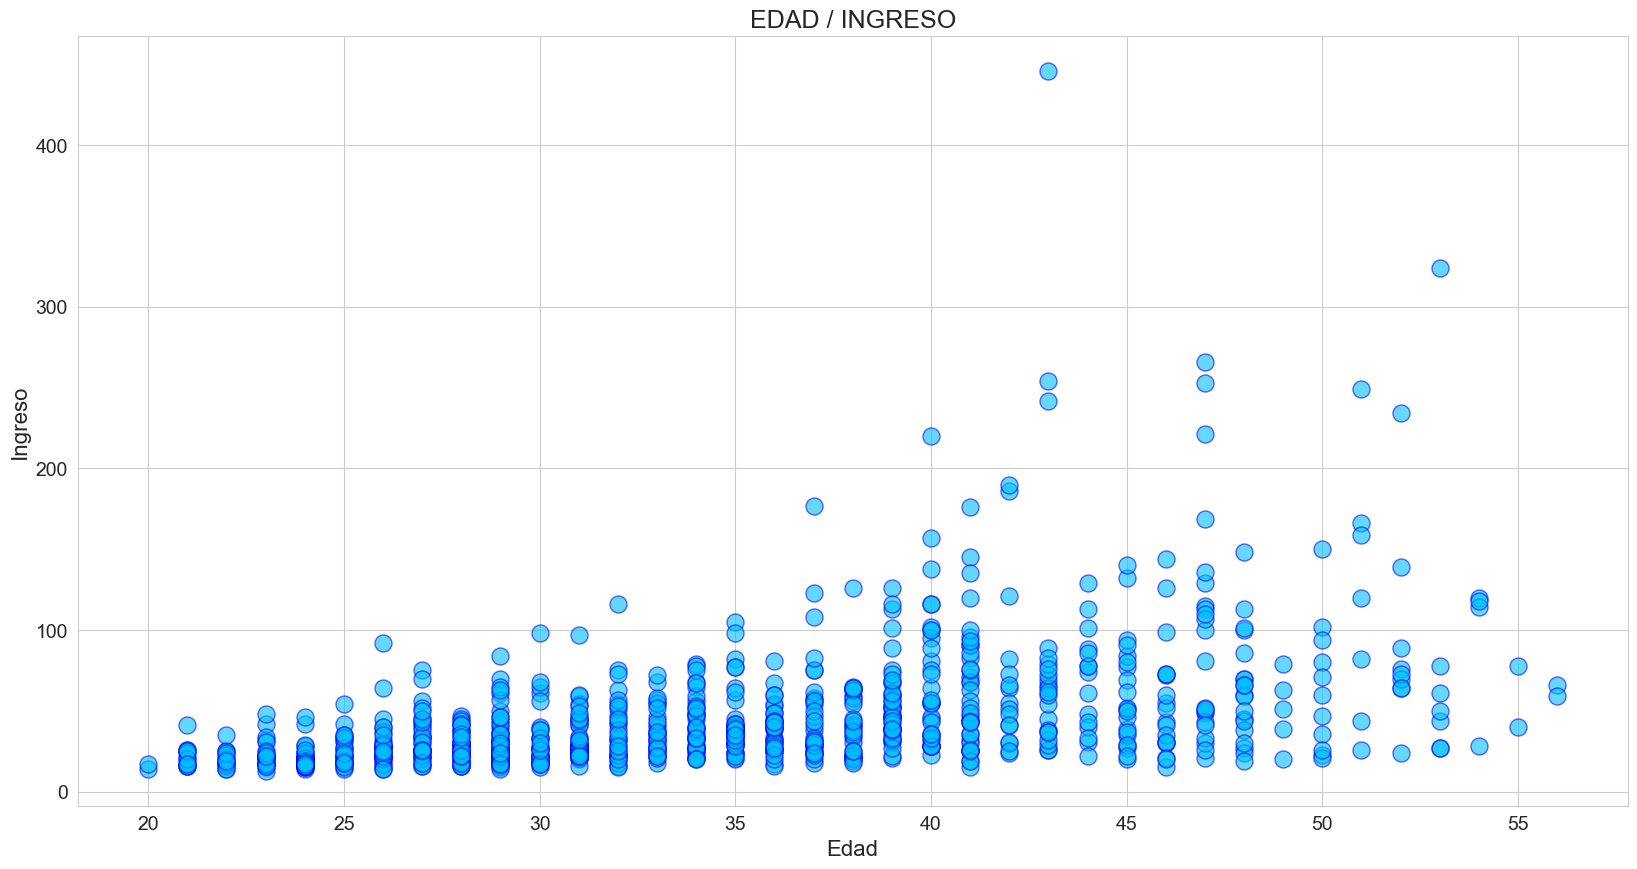

In [11]:
# Graficar la relación entre edad e ingreso
sns.scatterplot(x='Age', y='Income', data=df, color='deepskyblue', s=150, alpha=0.6, edgecolor='b')
plt.title('EDAD / INGRESO', fontsize=18)
plt.xlabel('Edad', fontsize=16)
plt.ylabel('Ingreso', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.savefig('age_income.png')
plt.show()


Como podemos ver, cuando aumenta la edad, también aumentan los ingresos. Por lo tanto, podemos decir que los atributos "Edad" e "Ingresos" tienen una relación lineal.

A continuación, vamos a crear un gráfico de burbujas que represente los puntos de datos de los atributos "Ingresos", "Años de empleo" y "Relación deuda-ingresos". La única diferencia entre el gráfico de dispersión y el de burbujas es que el primero representa los puntos de datos de tres atributos, mientras que en el segundo sólo se visualizan dos. Para producir un gráfico de burbujas, podemos utilizar el método 'scatterplot' pero cambiando el tamaño de la dispersión para que sea del atributo 'DebtIncomeRatio'.

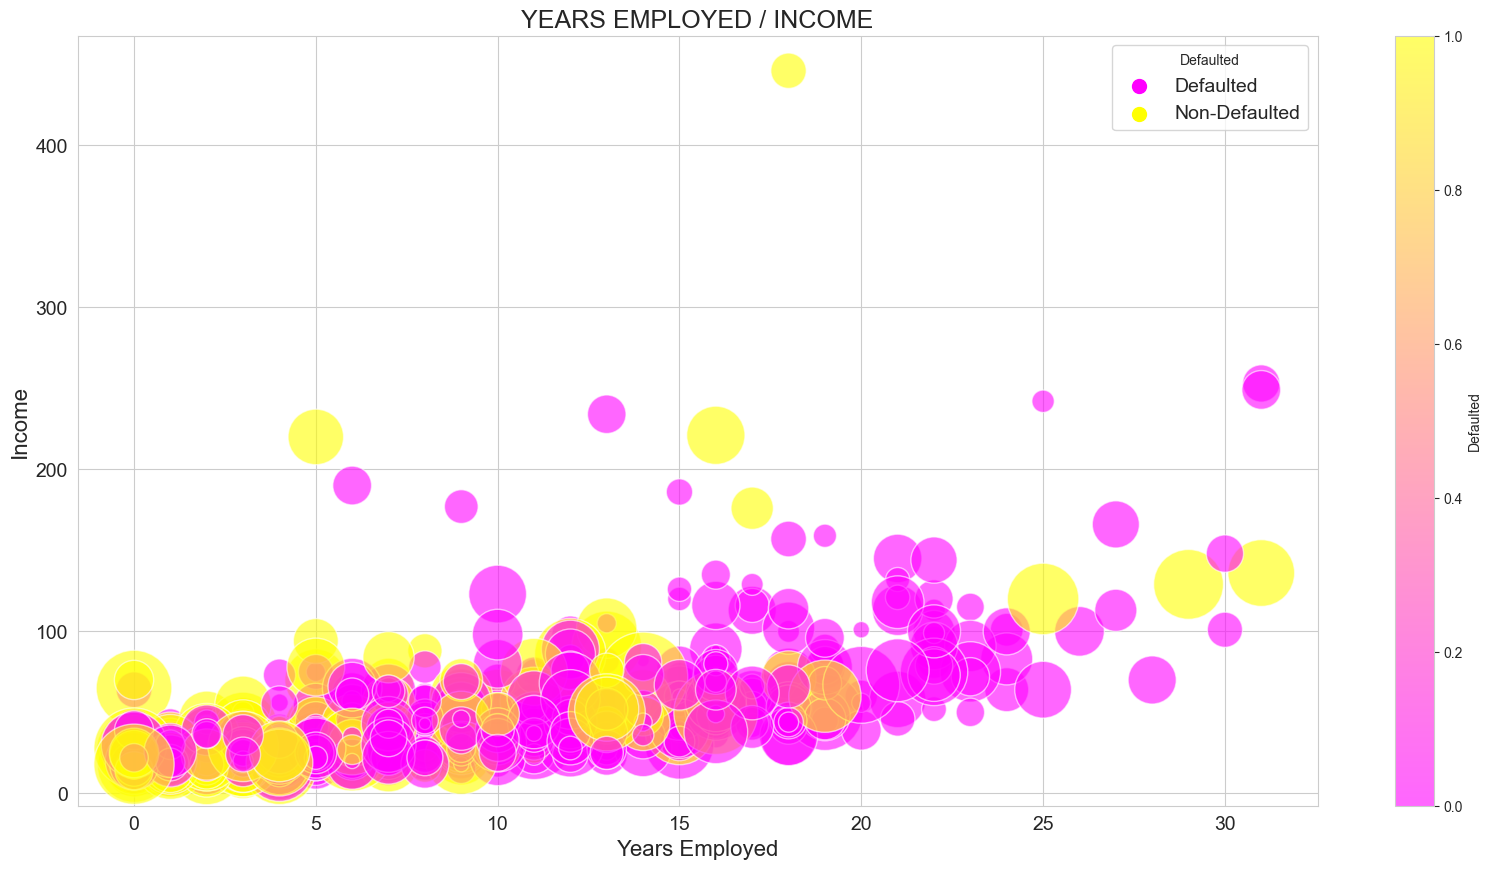

In [12]:
# Calcular el tamaño de los puntos proporcional a DebtIncomeRatio
size = df['DebtIncomeRatio'].abs() * 100

# Graficar la relación entre Years Employed e Income
plt.scatter(x=df['Years Employed'], y=df['Income'],
            s=size, alpha=0.6, edgecolor='white',
            c=df['Defaulted'], cmap='spring')
plt.title('YEARS EMPLOYED / INCOME', fontsize=18)
plt.xlabel('Years Employed', fontsize=16)
plt.ylabel('Income', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.colorbar(label='Defaulted')

# Agregar leyenda en la esquina superior derecha
default_patch = plt.scatter([], [], marker='o', s=100, color='magenta', label='Defaulted')
non_default_patch = plt.scatter([], [], marker='o', s=100, color='yellow', label='Non-Defaulted')
plt.legend(handles=[default_patch, non_default_patch], title='Defaulted', loc='upper right', fontsize=14)

plt.savefig('y_income.png')
plt.show()


El gráfico anterior muestra los puntos de datos de tres atributos y, además, los puntos de dispersión están coloreados en función del atributo "Incumplimiento". También podemos observar una relación lineal entre el atributo "Años de empleo" e "Ingresos".

Con esto, hemos explorado con éxito los datos en todos los aspectos que podíamos. Así que vamos a proceder al siguiente paso.

### Procesar los datos según las necesidades

En este paso, vamos a normalizar el conjunto de datos y es muy importante para construir nuestro modelo. Pero, ¿qué es la normalización?

__La normalización es un método estadístico que ayuda a los algoritmos basados en matemáticas a interpretar características con diferentes magnitudes y distribuciones por igual__

Usando la función 'StandardScaler' proporcionada por el paquete scikit-learn, podemos realizar la normalización sobre el conjunto de datos en python.

In [13]:
# DATA PROCESSING

X = df.values
X = np.nan_to_num(X)

sc = StandardScaler()

cluster_data = sc.fit_transform(X)
print("Cluster data samples : ", cluster_data[:5])

Cluster data samples :  [[ 0.74291541  0.31212243 -0.37878978 -0.71845859 -0.68381116 -0.59048916
  -0.52379654 -0.57652509]
 [ 1.48949049 -0.76634938  2.5737211   1.38432469  1.41447366  1.51296181
  -0.52379654  0.39138677]
 [-0.25251804  0.31212243  0.2117124   0.26803233  2.13414111  0.80170393
   1.90913822  1.59755385]
 [-0.75023477  0.31212243 -0.67404087 -0.71845859 -0.42164323 -0.75446707
  -0.52379654 -0.57652509]
 [ 1.48949049 -0.76634938  3.31184882  5.35624866  3.63890032  1.71609424
  -0.52379654 -0.44250653]]


In [14]:
# Determinar los valores faltantes en el DataFrame
valores_faltantes = df.isnull().sum()

# Mostrar un resumen de los valores faltantes
print(valores_faltantes)

# Eliminar las filas con valores faltantes
df_sin_nulos = df.dropna()

# Mostrar la forma del DataFrame sin filas con valores faltantes
print('Forma del DataFrame sin filas con valores faltantes:', df_sin_nulos.shape)

# Determinar los valores faltantes en el DataFrame
df_sin_nulos = df_sin_nulos.isnull().sum()

# Mostrar un resumen de los valores faltantes
print(df_sin_nulos)


Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
DebtIncomeRatio      0
dtype: int64
Forma del DataFrame sin filas con valores faltantes: (700, 8)
Age                0
Edu                0
Years Employed     0
Income             0
Card Debt          0
Other Debt         0
Defaulted          0
DebtIncomeRatio    0
dtype: int64


### Modelado de datos

Podemos construir el K-Means en python usando el algoritmo 'KMeans' proporcionado por el paquete scikit-learn.

La clase KMeans tiene muchos parámetros que se pueden utilizar, pero vamos a utilizar estos tres:

- init - Método de inicialización de los centroides. El valor será: 'k-means++'. k-means++ - Selecciona los centros iniciales de los clusters para el clustering k-means de forma inteligente para acelerar la convergencia.
- n_clusters - El número de clusters a formar así como el número de centroides a generar. El valor será 3
- n_init - Número de veces que se ejecutará el algoritmo k-means con diferentes semillas de centroides. El resultado final será el mejor resultado de n_init ejecuciones consecutivas en términos de inercia. El valor será 12
- Después de construir el modelo, vamos a ajustar y definir una variable 'labels' para almacenar las etiquetas de los clusters del modelo construido. ¡Hagámoslo en python!

In [15]:
# MODELING

clusters = 10
model = KMeans(init = 'k-means++', 
               n_clusters = clusters, 
               n_init = 12)
model.fit(X)

labels = model.labels_
print(labels[:100])


[9 7 0 8 5 4 0 0 2 7 4 6 8 9 8 8 8 9 0 6 8 6 6 4 7 0 8 6 0 6 7 0 6 9 6 6 6
 9 8 7 8 7 2 1 9 4 2 8 8 0 4 2 2 4 0 9 8 8 0 9 0 6 0 4 8 6 4 8 9 2 0 4 7 6
 6 8 6 8 1 0 0 0 1 6 0 8 8 8 8 2 4 6 8 2 8 6 9 6 2 8]


Ahora hemos construido y ajustado con éxito nuestro modelo K-Means y almacenado las etiquetas de los clusters en la variable 'labels'. Usando las etiquetas producidas por el modelo podemos encontrar algunas ideas útiles sobre el modelo y llegar a una conclusión.

Ahora hay que determinar el número óptimo de clústers en los datos.

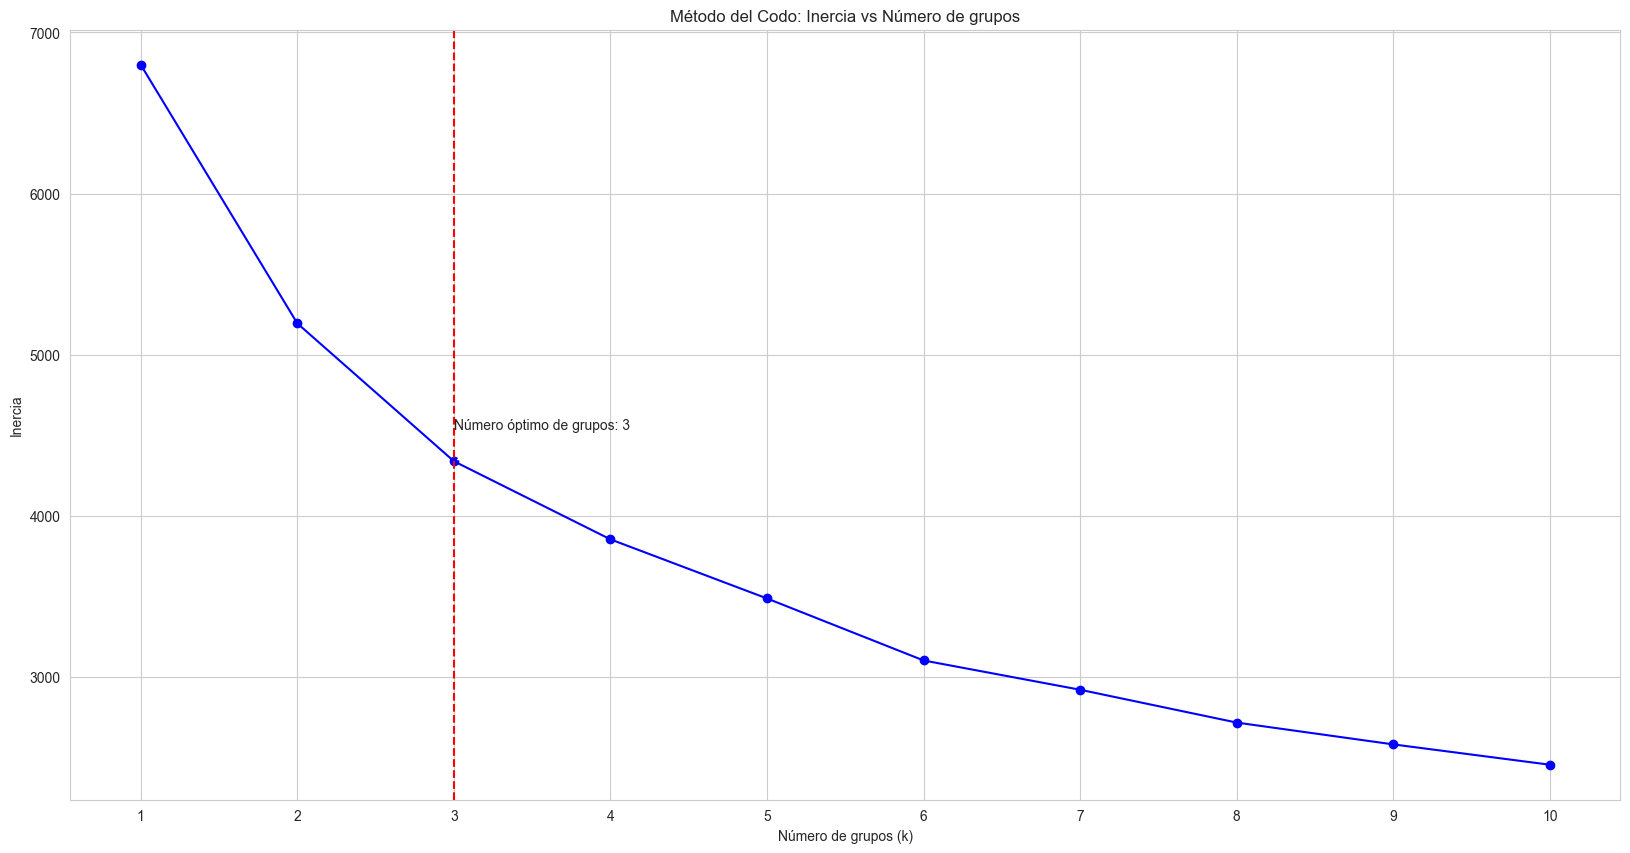

In [16]:
# Determinar el número óptimo de grupos utilizando el método del codo
inercia = []
k_values = range(1, 11)  # Probar diferentes valores de k (número de grupos)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(cluster_data)
    inercia.append(kmeans.inertia_)

# Graficar la curva de inercia
plt.plot(k_values, inercia, 'bo-')
plt.xlabel('Número de grupos (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo: Inercia vs Número de grupos')
plt.xticks(k_values)

# Encontrar el número óptimo de grupos
optimal_k = 3  # Establecer el número óptimo de grupos

# Dibujar la línea punteada perpendicular roja en el número óptimo de grupos
plt.axvline(x=optimal_k, color='red', linestyle='--')
plt.annotate(f'Número óptimo de grupos: {optimal_k}', xy=(optimal_k, inercia[optimal_k-1]), xytext=(optimal_k, inercia[optimal_k-1] + 200), 
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.show()

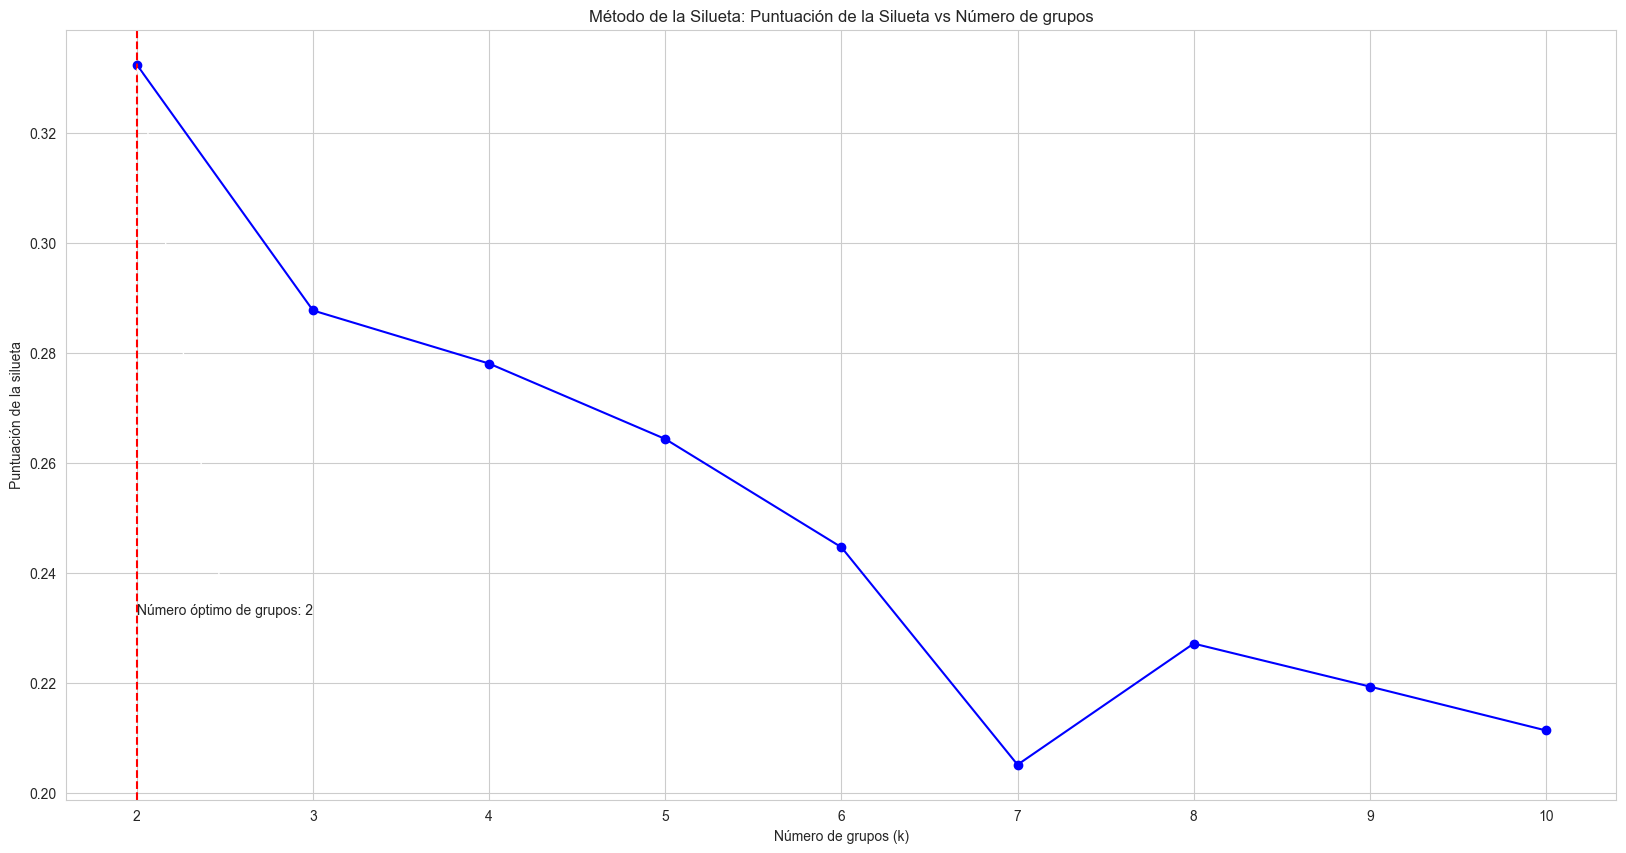

In [17]:
# Determinar el número óptimo de grupos utilizando el método de la silueta
silhouette_scores = []
k_values = range(2, 11)  # Probar diferentes valores de k (número de grupos)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(cluster_data)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(cluster_data, labels)
    silhouette_scores.append(silhouette_avg)

# Graficar la curva de la silueta
plt.plot(k_values, silhouette_scores, 'bo-')
plt.xlabel('Número de grupos (k)')
plt.ylabel('Puntuación de la silueta')
plt.title('Método de la Silueta: Puntuación de la Silueta vs Número de grupos')
plt.xticks(k_values)

# Encontrar el número óptimo de grupos
optimal_k = k_values[np.argmax(silhouette_scores)]  # Obtener el valor de k con la puntuación de silueta máxima

# Dibujar la línea punteada perpendicular roja en el número óptimo de grupos
plt.axvline(x=optimal_k, color='red', linestyle='--')
plt.annotate(f'Número óptimo de grupos: {optimal_k}', xy=(optimal_k, silhouette_scores[optimal_k-2]), 
             xytext=(optimal_k, silhouette_scores[optimal_k-2] - 0.1), 
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.show()

### Perspectivas del modelo

Para empezar a encontrar algunos insights útiles, tenemos que añadir un atributo a los datos del cliente que muestre el valor del cluster para cada fila.

Ya que el número óptimo sugerido se encuentra entre 2 y 3, es decisión del analista la opción final. En este ejercicio se determinó que 3 sería la mejor opción, para no dejar ningún grupo fuera.

In [18]:
# MODELING

clusters = 3
model = KMeans(init = 'k-means++', 
               n_clusters = clusters, 
               n_init = 12)
model.fit(X)

labels = model.labels_
print(cl(labels[:100], attrs = ['bold']))


[0 2 0 0 1 2 0 2 0 2 2 0 0 0 0 0 0 0 2 0 0 0 0 2 2 2 0 0 2 0 2 0 0 0 0 0 0
 0 0 2 0 2 0 1 0 2 0 0 0 2 2 0 0 2 2 0 0 0 2 0 2 0 2 2 0 0 2 0 0 0 2 2 2 0
 0 0 0 0 2 0 2 2 1 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0]


In [19]:
df['cluster_num'] = labels
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,cluster_num
Customer Id,,,,,,,,,
1,41,2,6,19,0.124,1.073,0.0,6.3,0
2,47,1,26,100,4.582,8.218,0.0,12.8,2
3,33,2,10,57,6.111,5.802,1.0,20.9,0
4,29,2,4,19,0.681,0.516,0.0,6.3,0
5,47,1,31,253,9.308,8.908,0.0,7.2,1


Como puedes ver, hemos creado un nuevo atributo llamado `cluster_num` en los datos del cliente que representa a qué valor de cluster pertenece cada una de las filas.

Ahora vamos a utilizar el método `groupby` para agrupar el valor de cluster y ver el valor medio de cada uno de los atributos en el conjunto de datos utilizando el método 'mean'.

In [20]:
df.groupby('cluster_num').mean()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
cluster_num,,,,,,,,
0,32.964561,1.614792,6.374422,31.164869,1.032541,2.104133,0.285185,10.094761
1,45.388889,2.666667,19.555556,227.166667,5.678444,10.907167,0.285714,7.322222
2,41.333333,1.956284,15.256831,83.928962,3.103639,5.765279,0.171233,10.724590


Veamos la distribución de los clientes en función de su edad e ingresos mediante un gráfico de burbujas y el color representa el valor del conglomerado.

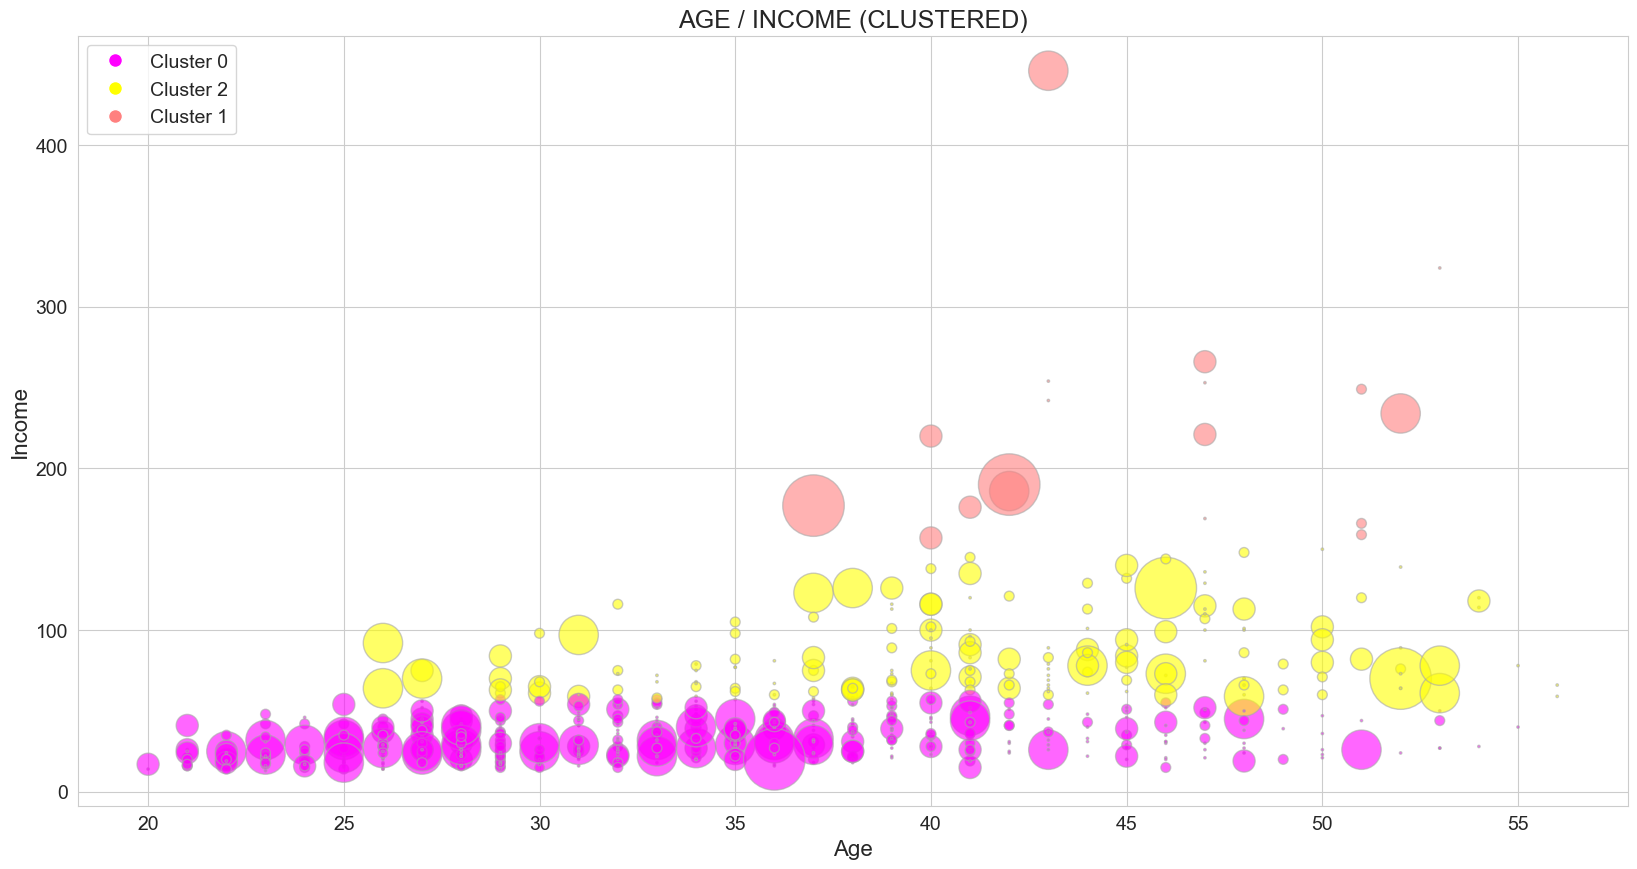

In [21]:
area = np.pi * (df['Edu']) ** 4

scatter = plt.scatter('Age', 'Income', 
                      data=df, 
                      s=area, 
                      c='cluster_num', 
                      cmap='spring', 
                      alpha=0.6, 
                      edgecolor='darkgrey')

plt.title('AGE / INCOME (CLUSTERED)', 
          fontsize=18)
plt.xlabel('Age', 
           fontsize=16)
plt.ylabel('Income', 
           fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Crear una leyenda manualmente
legend_elements = []
for cluster_num in df['cluster_num'].unique():
    legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster_num}', 
                                      markerfacecolor=scatter.cmap(scatter.norm(cluster_num)), markersize=10))

plt.legend(handles=legend_elements, loc='upper left', fontsize=14)

plt.savefig('c_age_income.png')
plt.show()


En lugar de analizar un gráfico de burbujas bidimensional, sería más eficaz analizar un gráfico de dispersión tridimensional y también sería mucho más fácil llegar a una conclusión. Podemos producir un gráfico de dispersión tridimensional utilizando el paquete `mplot3d` de python. Siga el código para producir un gráfico de dispersión tridimensional en python con el uso del paquete `mplot3d`.

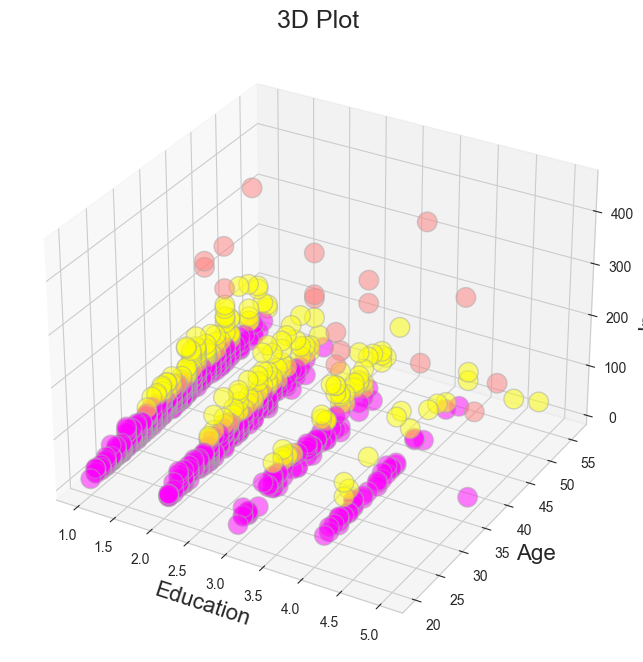

In [22]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['Edu'], df['Age'], df['Income'], 
           c=df['cluster_num'], 
           s=200, 
           cmap='spring', 
           alpha=0.5, 
           edgecolor='darkgrey')

ax.set_xlabel('Education', fontsize=16)
ax.set_ylabel('Age', fontsize=16)
ax.set_zlabel('Income', fontsize=16)

plt.title('3D Plot', fontsize=18)
plt.savefig('3d_plot.png')
plt.show()


Nuestro modelo K-Means ha dividido a los clientes en grupos mutuamente excluyentes, que en nuestro caso son tres clusters. Los clientes de cada grupo son demográficamente similares. Ahora podemos crear un perfil para cada grupo, teniendo en cuenta las características comunes de cada cluster. Por ejemplo, los 3 clusters pueden ser:

- Acaudalados, Educados y Mayores
- Edad media y renta media
- Jóvenes y bajos ingresos

Ya está. Hemos construido con éxito nuestro modelo de K-Means y hemos hecho la segmentación de clientes a partir de él. Espero que encuentres este artículo útil y muchas gracias y también he proporcionado el código completo al final de este artículo.